<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/RM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
import missingno as mn
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('/content/drive/MyDrive/ipynb/datasets/Airbnb NYC 2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [54]:
df.drop_duplicates(inplace=True)
df.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [55]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

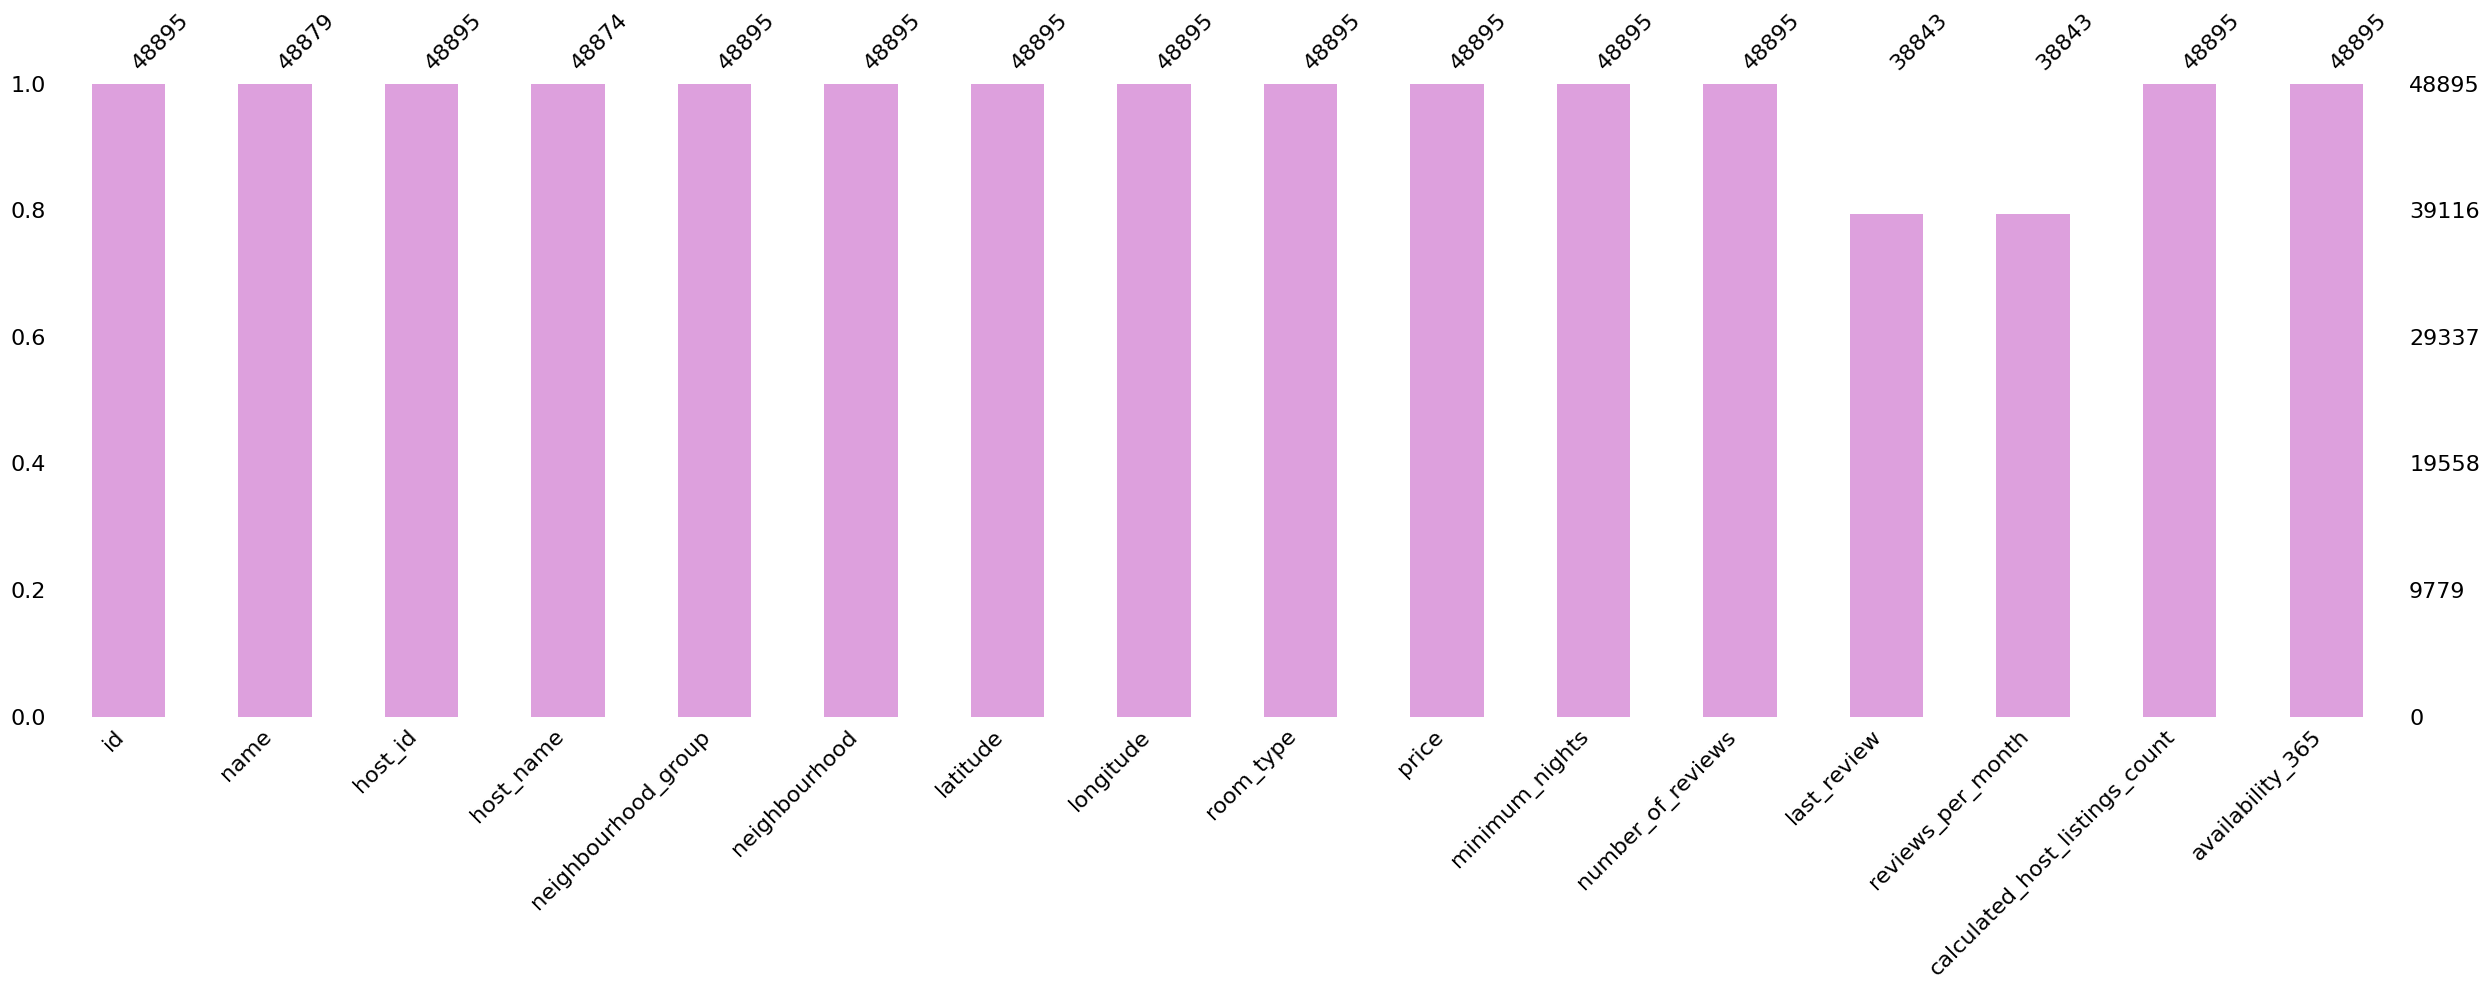

In [56]:
mn.bar(df, labels=True, color='plum')
pt.tight_layout()

In [57]:
df.drop(['last_review'], axis=1)
df['reviews_per_month'] = df['reviews_per_month'].replace\
                            (to_replace=np.nan,value=0).astype('int64')

In [58]:
df.dropna(inplace=True)
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [59]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.014863,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.621980,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.000000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.000000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.000000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


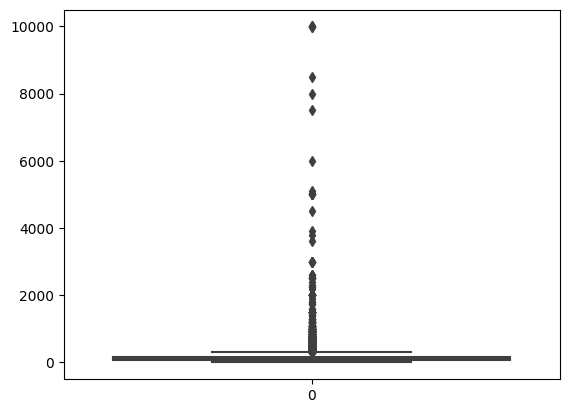

In [60]:
sb.boxplot(df['price']);

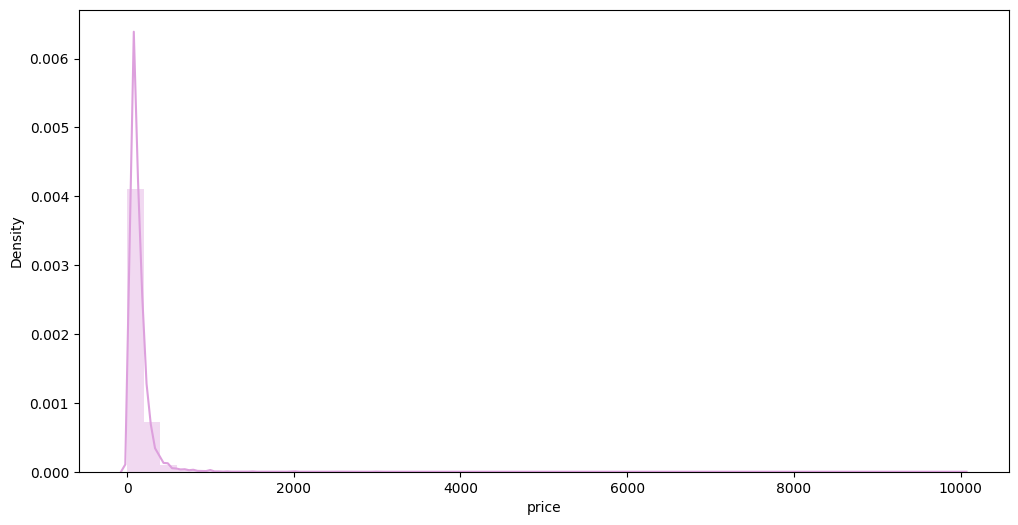

In [61]:
pt.figure(figsize=(12,6))
pt.tight_layout()
sb.distplot(df['price'], color='plum');

In [62]:
def IQR(col):
  Q1 = np.percentile(col, 25)
  Q3 = np.percentile(col, 75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  return lower, upper

In [63]:
lower, upper = IQR(df['price'])
df = df[(df['price']>lower) & (df['price']<upper)]

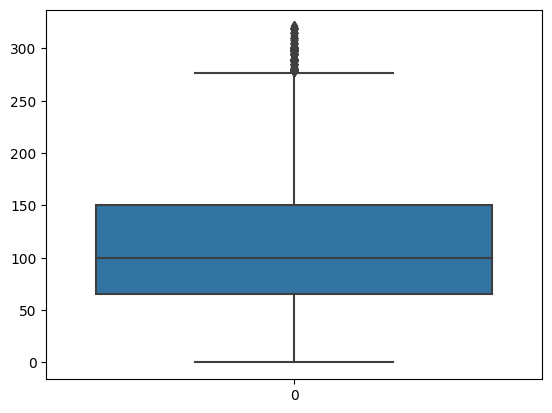

In [64]:
sb.boxplot(df['price']);

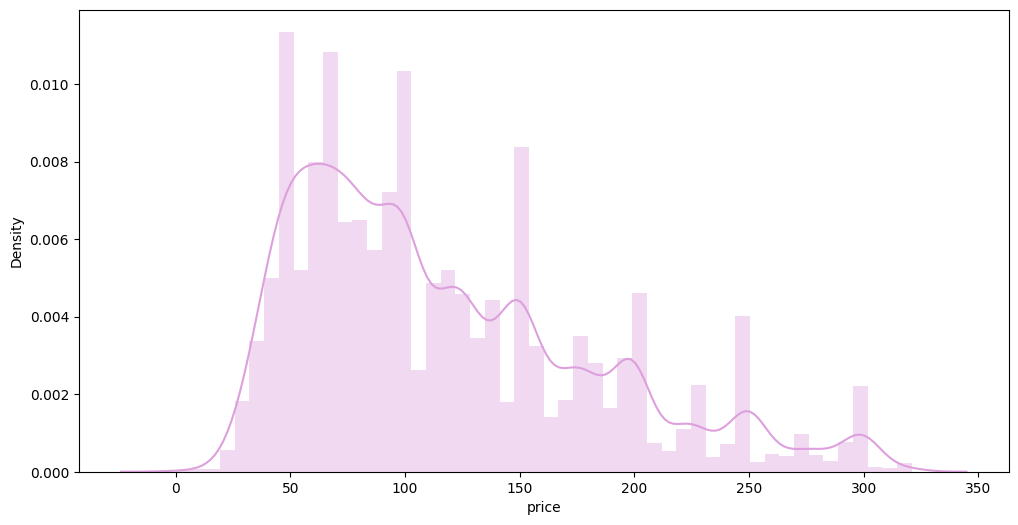

In [65]:
pt.figure(figsize=(12,6))
pt.tight_layout()
sb.distplot(df['price'], color='plum');

In [67]:
df['neighbourhood_group'].value_counts()

Brooklyn         15891
Manhattan        15171
Queens            4506
Bronx              864
Staten Island      312
Name: neighbourhood_group, dtype: int64

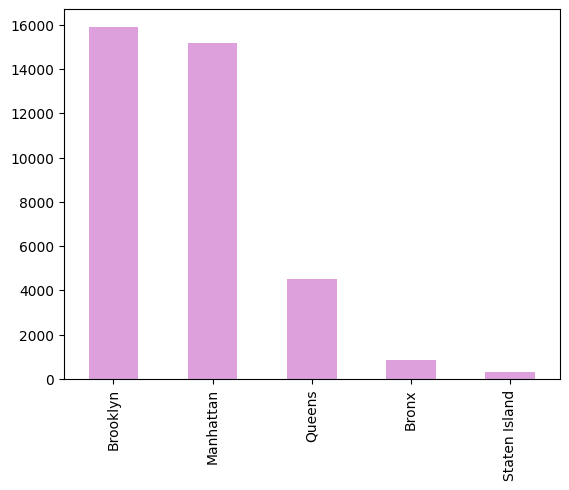

In [72]:
df['neighbourhood_group'].value_counts().plot(kind='bar', color='plum');

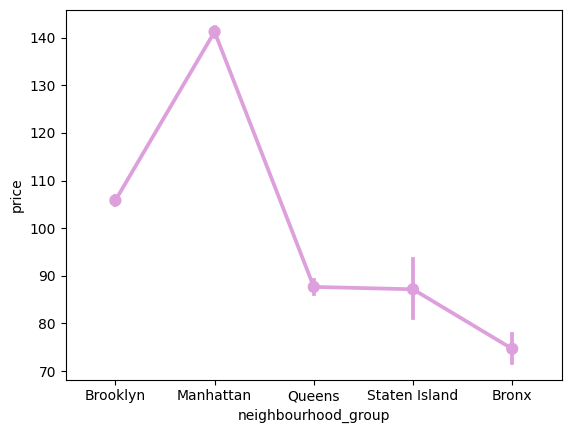

In [74]:
sb.pointplot(x = 'neighbourhood_group', y='price', data=df, estimator = np.mean, color='plum');

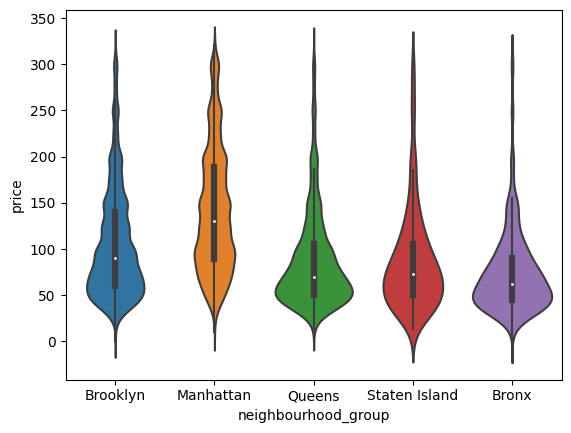

In [75]:
sb.violinplot(x='neighbourhood_group',y='price',data=df);

**WE OBSERVE**
*   The distribution of listings across the different neighbourhood groups is skewed.

* There is a concentration of listings in Manhattan and Brooklyn.

*   The demand for Airbnb rentals is higher in Manhattan compared to the other neighborhoods, leading to a higher concentration of listings in this area.

*   Or it could also mean that the supply of listings is higher in Manhattan due to a higher number of property owners in this area using Airbnb.

In [76]:
df['neighbourhood'].value_counts()

Bedford-Stuyvesant    3082
Williamsburg          3008
Harlem                2145
Bushwick              1919
East Village          1391
                      ... 
Westerleigh              2
Eltingville              2
Rossville                1
Willowbrook              1
Richmondtown             1
Name: neighbourhood, Length: 218, dtype: int64

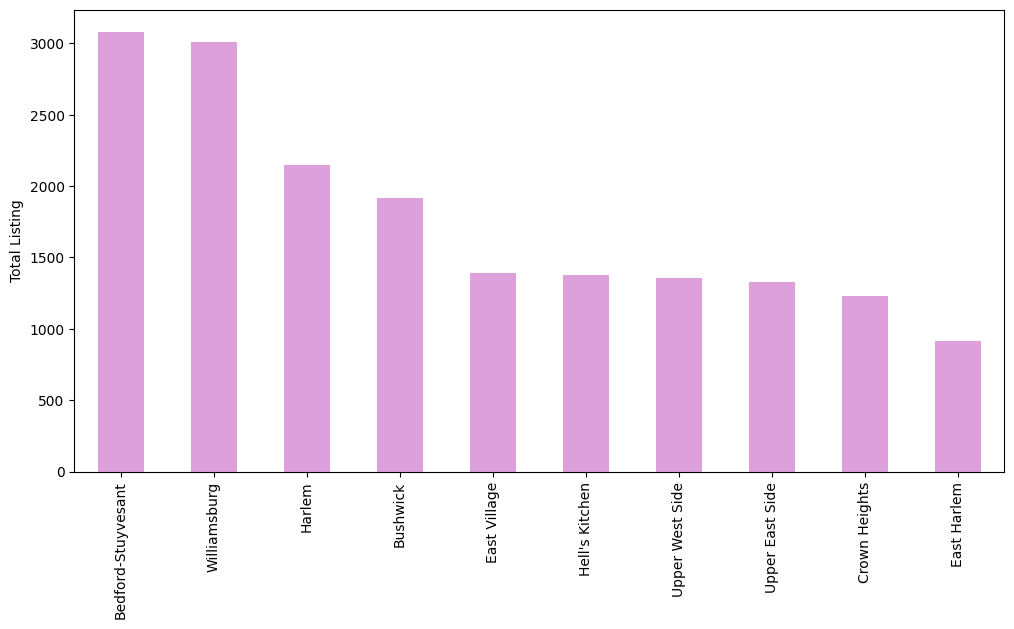

In [91]:
pt.figure(figsize=(12,6))
df['neighbourhood'].value_counts()[:10].plot(kind='bar', color='plum', label=True)
pt.ylabel('Total Listing');

The top neighborhoods in New York City in terms of listing counts are Bedford-Stuyvesant, Williamsburg, Harlem and Bushwick.

In [90]:
df['host_name'].value_counts()

Michael       309
David         285
John          236
Alex          203
Sarah         174
             ... 
Marie Yves      1
Fiz             1
Chandra         1
Jeevan          1
Rusaa           1
Name: host_name, Length: 9547, dtype: int64

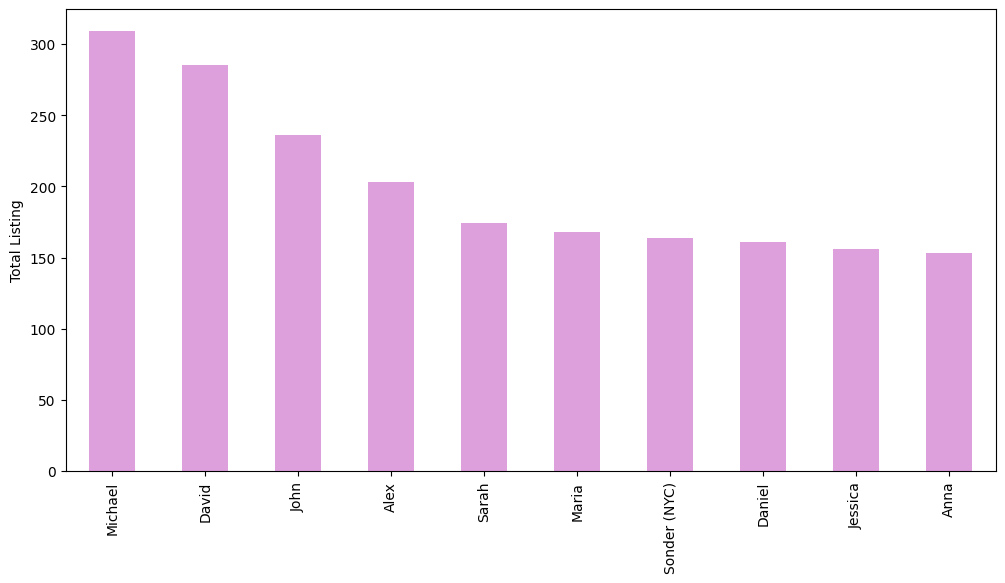

In [92]:
pt.figure(figsize=(12,6))
df['host_name'].value_counts()[:10].plot(kind='bar', color='plum', label=True)
pt.ylabel('Total Listing');

We see that Michael, David and John are the top hosts on Airbnb.

In [110]:
nap = df.groupby(["neighbourhood", "latitude", "longitude"])['price'].mean().reset_index()
nap

,neighbourhood,latitude,longitude,price
0,Allerton,40.85753,-73.86605,85.0
1,Allerton,40.85840,-73.86969,49.0
2,Allerton,40.85914,-73.86979,38.0
3,Allerton,40.85956,-73.87067,39.0
4,Allerton,40.85961,-73.86361,49.0
...,...,...,...,...
36726,Woodside,40.75558,-73.90534,45.0
36727,Woodside,40.75563,-73.90493,50.0
36728,Woodside,40.75607,-73.90146,80.0
36729,Woodside,40.75608,-73.90535,65.0


The scatter of the mean price with respect to neighbourhood.

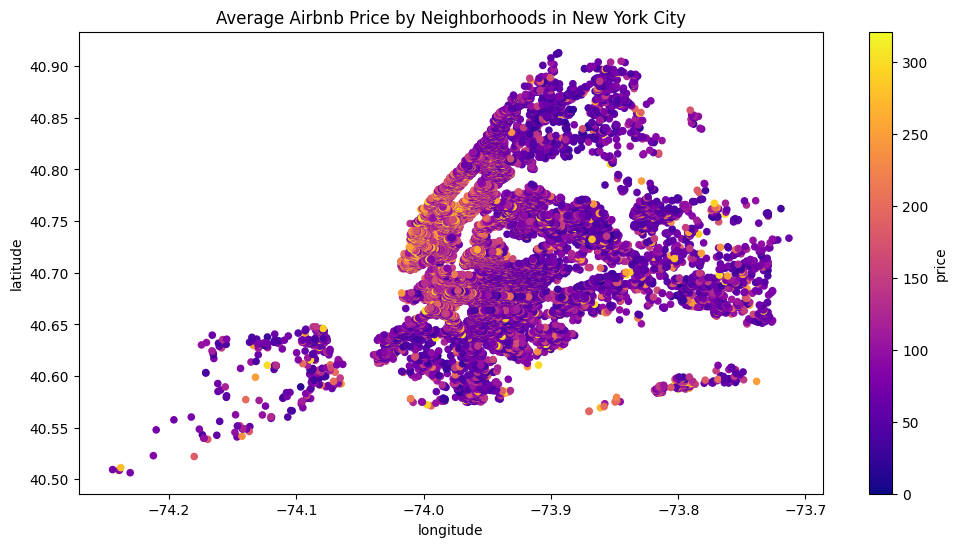

In [112]:
nap.plot.scatter(x="longitude", y="latitude",\
                title="Average Airbnb Price by Neighborhoods in New York City",\
                figsize=(12,6), c='price', cmap="plasma");